<a href="https://colab.research.google.com/github/Giya67/Data-Analytics-/blob/main/Overcoming_Critical_Challenges_in_Sustainable_Energy_Access_and_Utilization_in_Ethiopia_A_Data_Driven_Approach_Using_World_Bank_Indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#  Overcoming Critical Challenges in Sustainable Energy Access and Utilization in Ethiopia: A Data-Driven Approach Using World Bank Indicators




# Data Acquisition:

In [1]:

# This code imports necessary libraries, reads data from a CSV file hosted on Google Drive,
# and displays the first 10 rows of the dataset.

# Import the pandas library for data manipulation
import pandas as pd

# Import seaborn for advanced data visualization
import seaborn as sns

# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Define the URL of the CSV file stored on Google Drive this is the cleaned data
url = "https://drive.google.com/uc?export=download&id=1d8Crcvg8wxDJ2jlpzQsT5Gaop1d6fsPD"

# Read the CSV file from the URL into a pandas DataFrame
df = pd.read_csv(url)

# Display the first 10 rows of the DataFrame
df.head(10)



,Country Name,Country Code,Time,Time Code,Access to Clean Fuels and Technologies for cooking (% of total population) [2.1_ACCESS.CFT.TOT],Access to electricity (% of rural population with access) [1.2_ACCESS.ELECTRICITY.RURAL],Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT],Access to electricity (% of urban population with access) [1.3_ACCESS.ELECTRICITY.URBAN],Energy intensity level of primary energy (MJ/2011 USD PPP) [6.1_PRIMARY.ENERGY.INTENSITY],Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT],Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY],Renewable energy consumption (TJ) [3.1_RE.CONSUMPTION],Renewable energy share of TFEC (%) [2.1_SHARE.TOTAL.RE.IN.TFEC],Total electricity output (GWh) [4.1.1_TOTAL.ELECTRICITY.OUTPUT],Total final energy consumption (TFEC) (TJ) [1.1_TOTAL.FINAL.ENERGY.CONSUM]
0,Ethiopia,ETH,1990,YR1990,NaN,NaN,0.010000,73.693520,30.62777387,1062.0,88.352745,744589.6,96.635387,1202.0,7.705144e+05
1,Ethiopia,ETH,1991,YR1991,NaN,NaN,0.010000,74.277359,34.11260658,1082.0,89.495451,771364.8,96.711289,1209.0,7.975954e+05
2,Ethiopia,ETH,1992,YR1992,NaN,NaN,0.027325,74.861023,38.26219649,1151.0,92.747784,799706.7,97.740415,1241.0,8.181945e+05
3,Ethiopia,ETH,1993,YR1993,NaN,NaN,0.157242,75.443665,35.23218429,1263.0,91.323210,828873.0,97.198658,1383.0,8.527618e+05
4,Ethiopia,ETH,1994,YR1994,NaN,NaN,0.598654,76.024239,35.46826961,1354.0,93.314955,858338.6,96.883886,1451.0,8.859457e+05
5,Ethiopia,ETH,1995,YR1995,NaN,NaN,1.118786,76.601715,34.65784112,1428.0,93.516699,887468.7,96.620140,1527.0,9.185132e+05
6,Ethiopia,ETH,1996,YR1996,NaN,NaN,2.780769,77.175079,31.87746437,1510.0,94.198378,916096.3,96.351978,1603.0,9.507810e+05
7,Ethiopia,ETH,1997,YR1997,NaN,NaN,4.427457,77.743286,31.79393618,1566.0,97.026022,944380.2,96.220856,1614.0,9.814714e+05
8,Ethiopia,ETH,1998,YR1998,NaN,NaN,6.055790,78.305305,33.94198341,1605.0,97.096189,972518.4,96.100241,1653.0,1.011983e+06
9,Ethiopia,ETH,1999,YR1999,NaN,NaN,7.662709,78.860115,33.18132473,1625.0,98.844282,1000973.0,96.189490,1644.0,1.040626e+06


# Data Cleaning and Preparation:

In [3]:
# Using dataframe df: Data Cleaning and Preparation: Cleanse, preprocess, and transform the data for
# analysis.
import pandas as pd
import numpy as np

# Convert relevant columns to numeric, coercing errors to NaN
numeric_cols = [
    'Access to Clean Fuels and Technologies for cooking (% of total population) [2.1_ACCESS.CFT.TOT]',
    'Access to electricity (% of rural population with access) [1.2_ACCESS.ELECTRICITY.RURAL]',
    'Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT]',
    'Access to electricity (% of urban population with access) [1.3_ACCESS.ELECTRICITY.URBAN]',
    'Energy intensity level of primary energy (MJ/2011 USD PPP) [6.1_PRIMARY.ENERGY.INTENSITY]',
    'Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT]',
    'Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY]',
    'Renewable energy consumption (TJ) [3.1_RE.CONSUMPTION]',
    'Renewable energy share of TFEC (%) [2.1_SHARE.TOTAL.RE.IN.TFEC]',
    'Total electricity output (GWh) [4.1.1_TOTAL.ELECTRICITY.OUTPUT]',
    'Total final energy consumption (TFEC) (TJ) [1.1_TOTAL.FINAL.ENERGY.CONSUM]'
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Handle missing values (NaN) - choose an appropriate strategy
# Example: Fill NaN values with the mean of each column
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].mean())


# Remove duplicate rows if any
df = df.drop_duplicates()

# Check for and handle outliers (if necessary)
# Example: Using the IQR method for a specific column
# Q1 = df['column_name'].quantile(0.25)
# Q3 = df['column_name'].quantile(0.75)
# IQR = Q3 - Q1
# upper_bound = Q3 + 1.5 * IQR
# lower_bound = Q1 - 1.5 * IQR
# df = df[(df['column_name'] >= lower_bound) & (df['column_name'] <= upper_bound)]


#Feature Engineering (example)
#df['Electricity_access_diff'] = df['Access to electricity (% of urban population with access) [1.3_ACCESS.ELECTRICITY.URBAN]'] - df['Access to electricity (% of rural population with access) [1.2_ACCESS.ELECTRICITY.RURAL]']
print(df.head()) # Display the first few rows after cleaning

  Country Name Country Code  Time Time Code  \
0     Ethiopia          ETH  1990    YR1990   
1     Ethiopia          ETH  1991    YR1991   
2     Ethiopia          ETH  1992    YR1992   
3     Ethiopia          ETH  1993    YR1993   
4     Ethiopia          ETH  1994    YR1994   

   Access to Clean Fuels and Technologies for cooking (% of total population) [2.1_ACCESS.CFT.TOT]  \
0                                          20.177311                                                 
1                                          20.177311                                                 
2                                          20.177311                                                 
3                                          20.177311                                                 
4                                          20.177311                                                 

   Access to electricity (% of rural population with access) [1.2_ACCESS.ELECTRICITY.RURAL]  \
0        

# Exploratory Data Analysis (EDA):

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 15 columns):
 #   Column                                                                                           Non-Null Count  Dtype  
---  ------                                                                                           --------------  -----  
 0   Country Name                                                                                     189 non-null    object 
 1   Country Code                                                                                     189 non-null    object 
 2   Time                                                                                             189 non-null    int64  
 3   Time Code                                                                                        189 non-null    object 
 4   Access to Clean Fuels and Technologies for cooking (% of total population) [2.1_ACCESS.CFT.TOT]  189 non-null    float64
 5   Access t

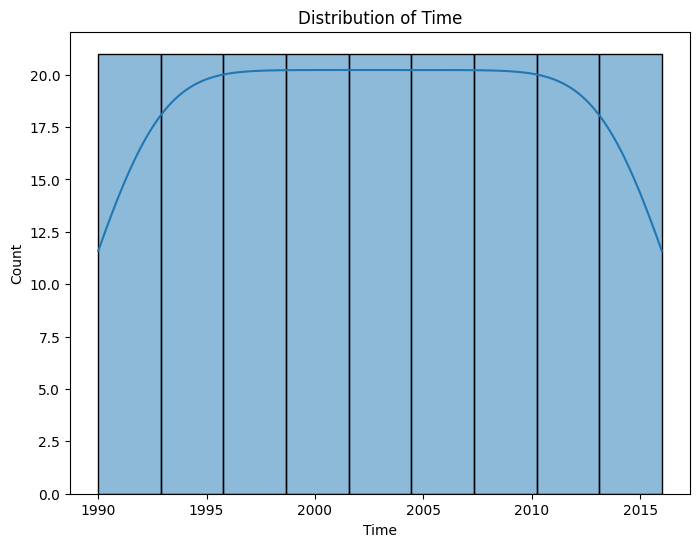

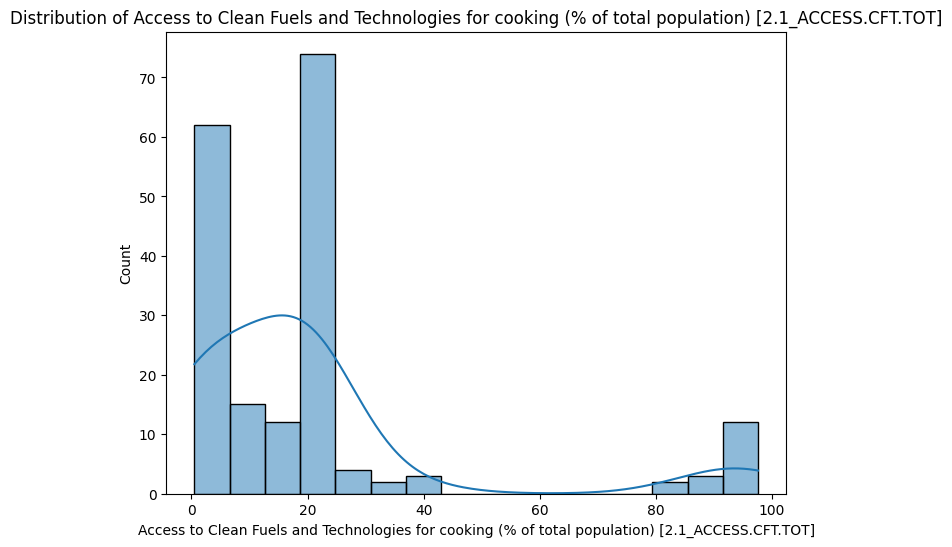

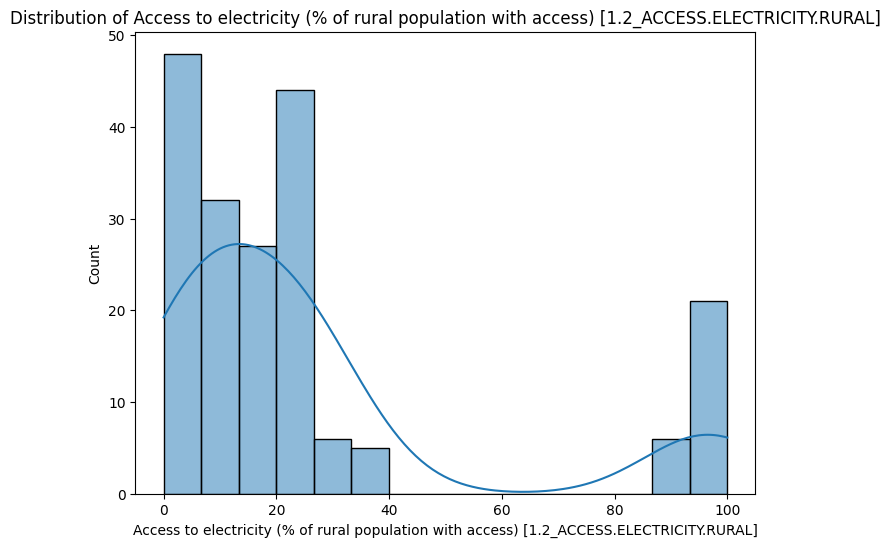

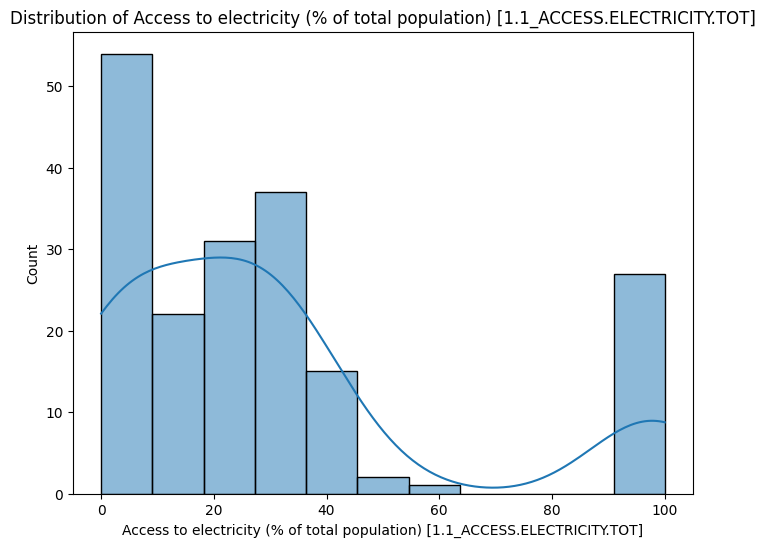

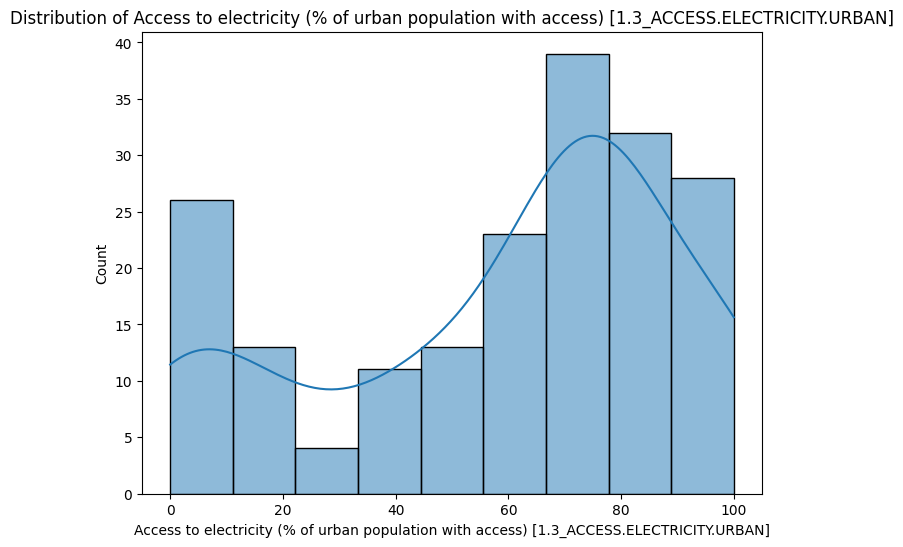

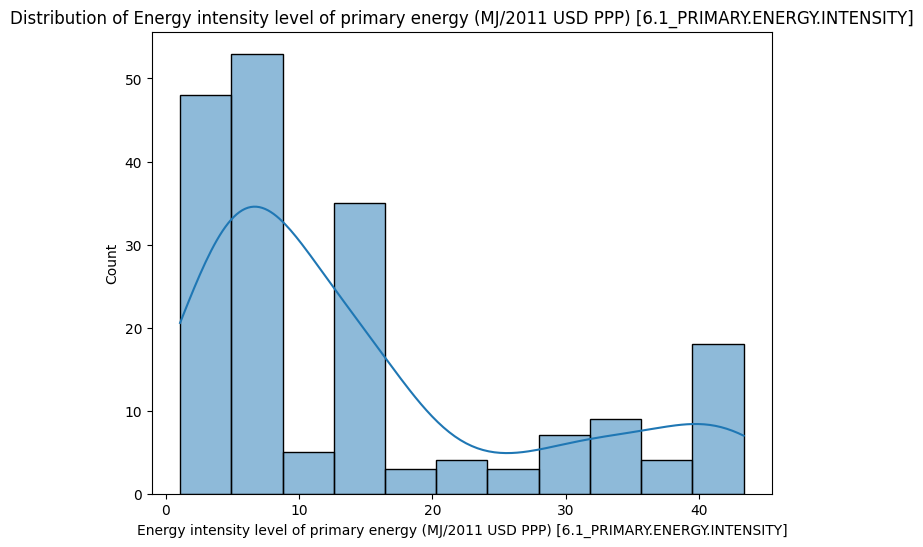

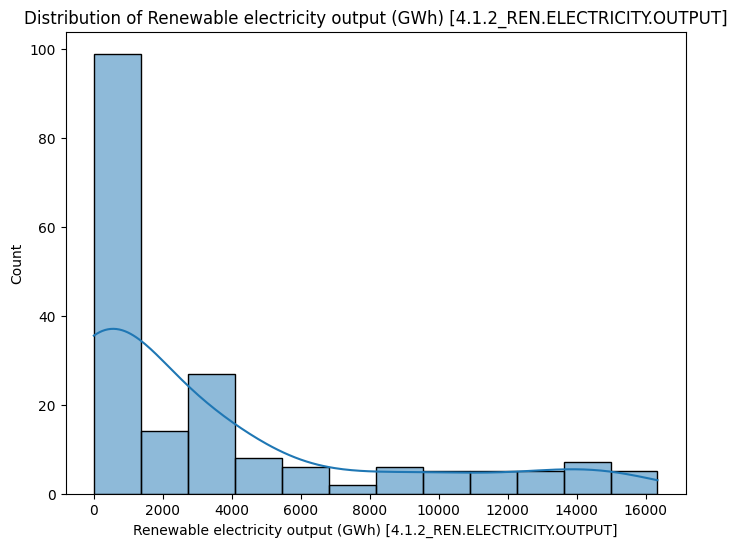

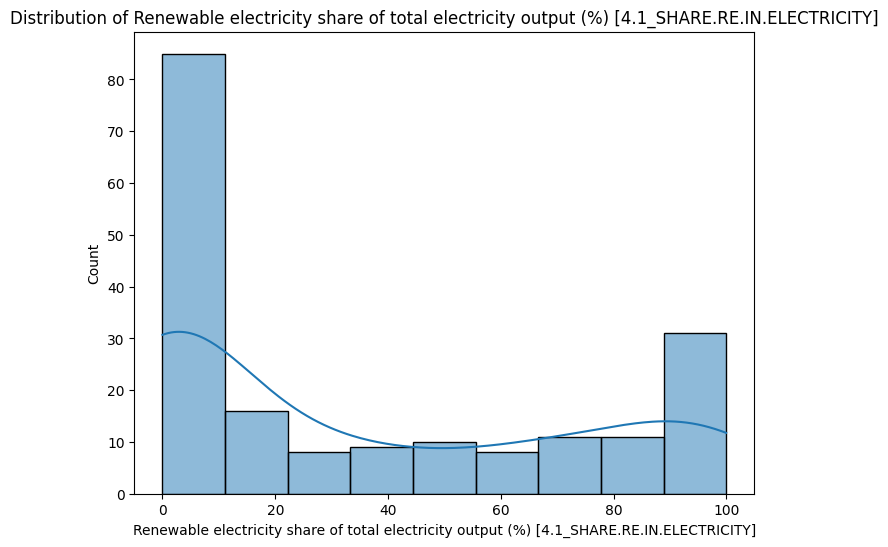

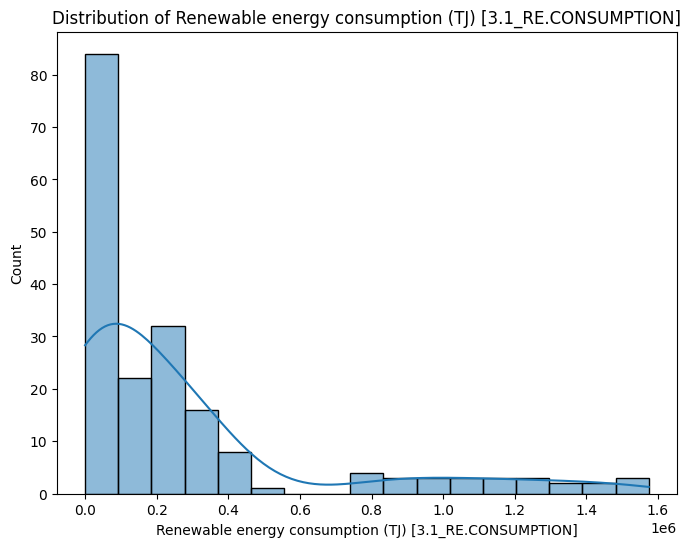

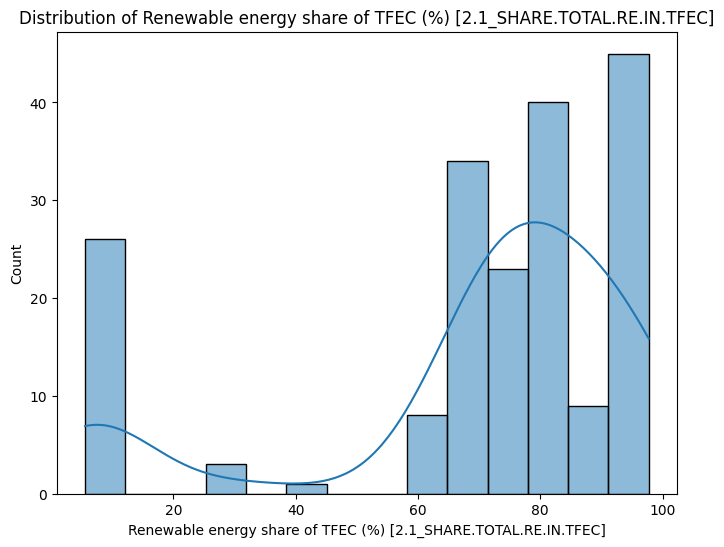

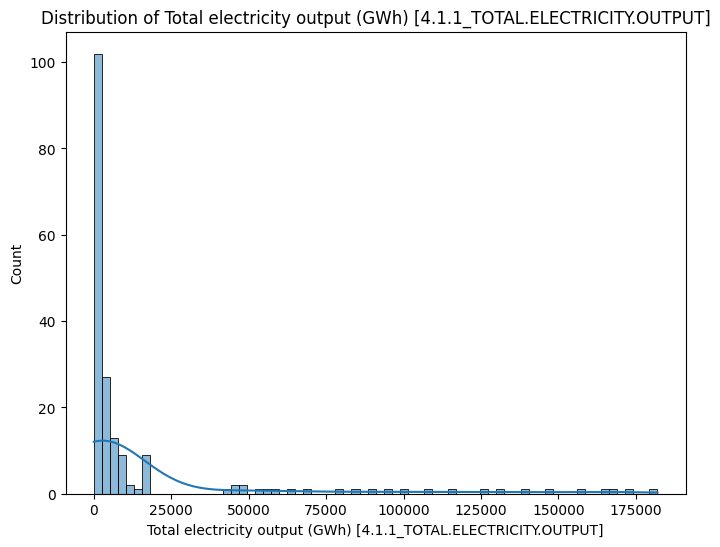

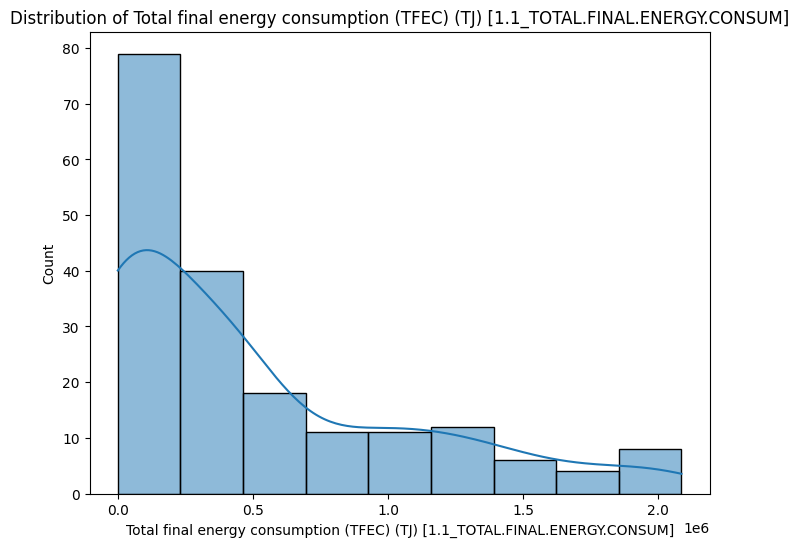

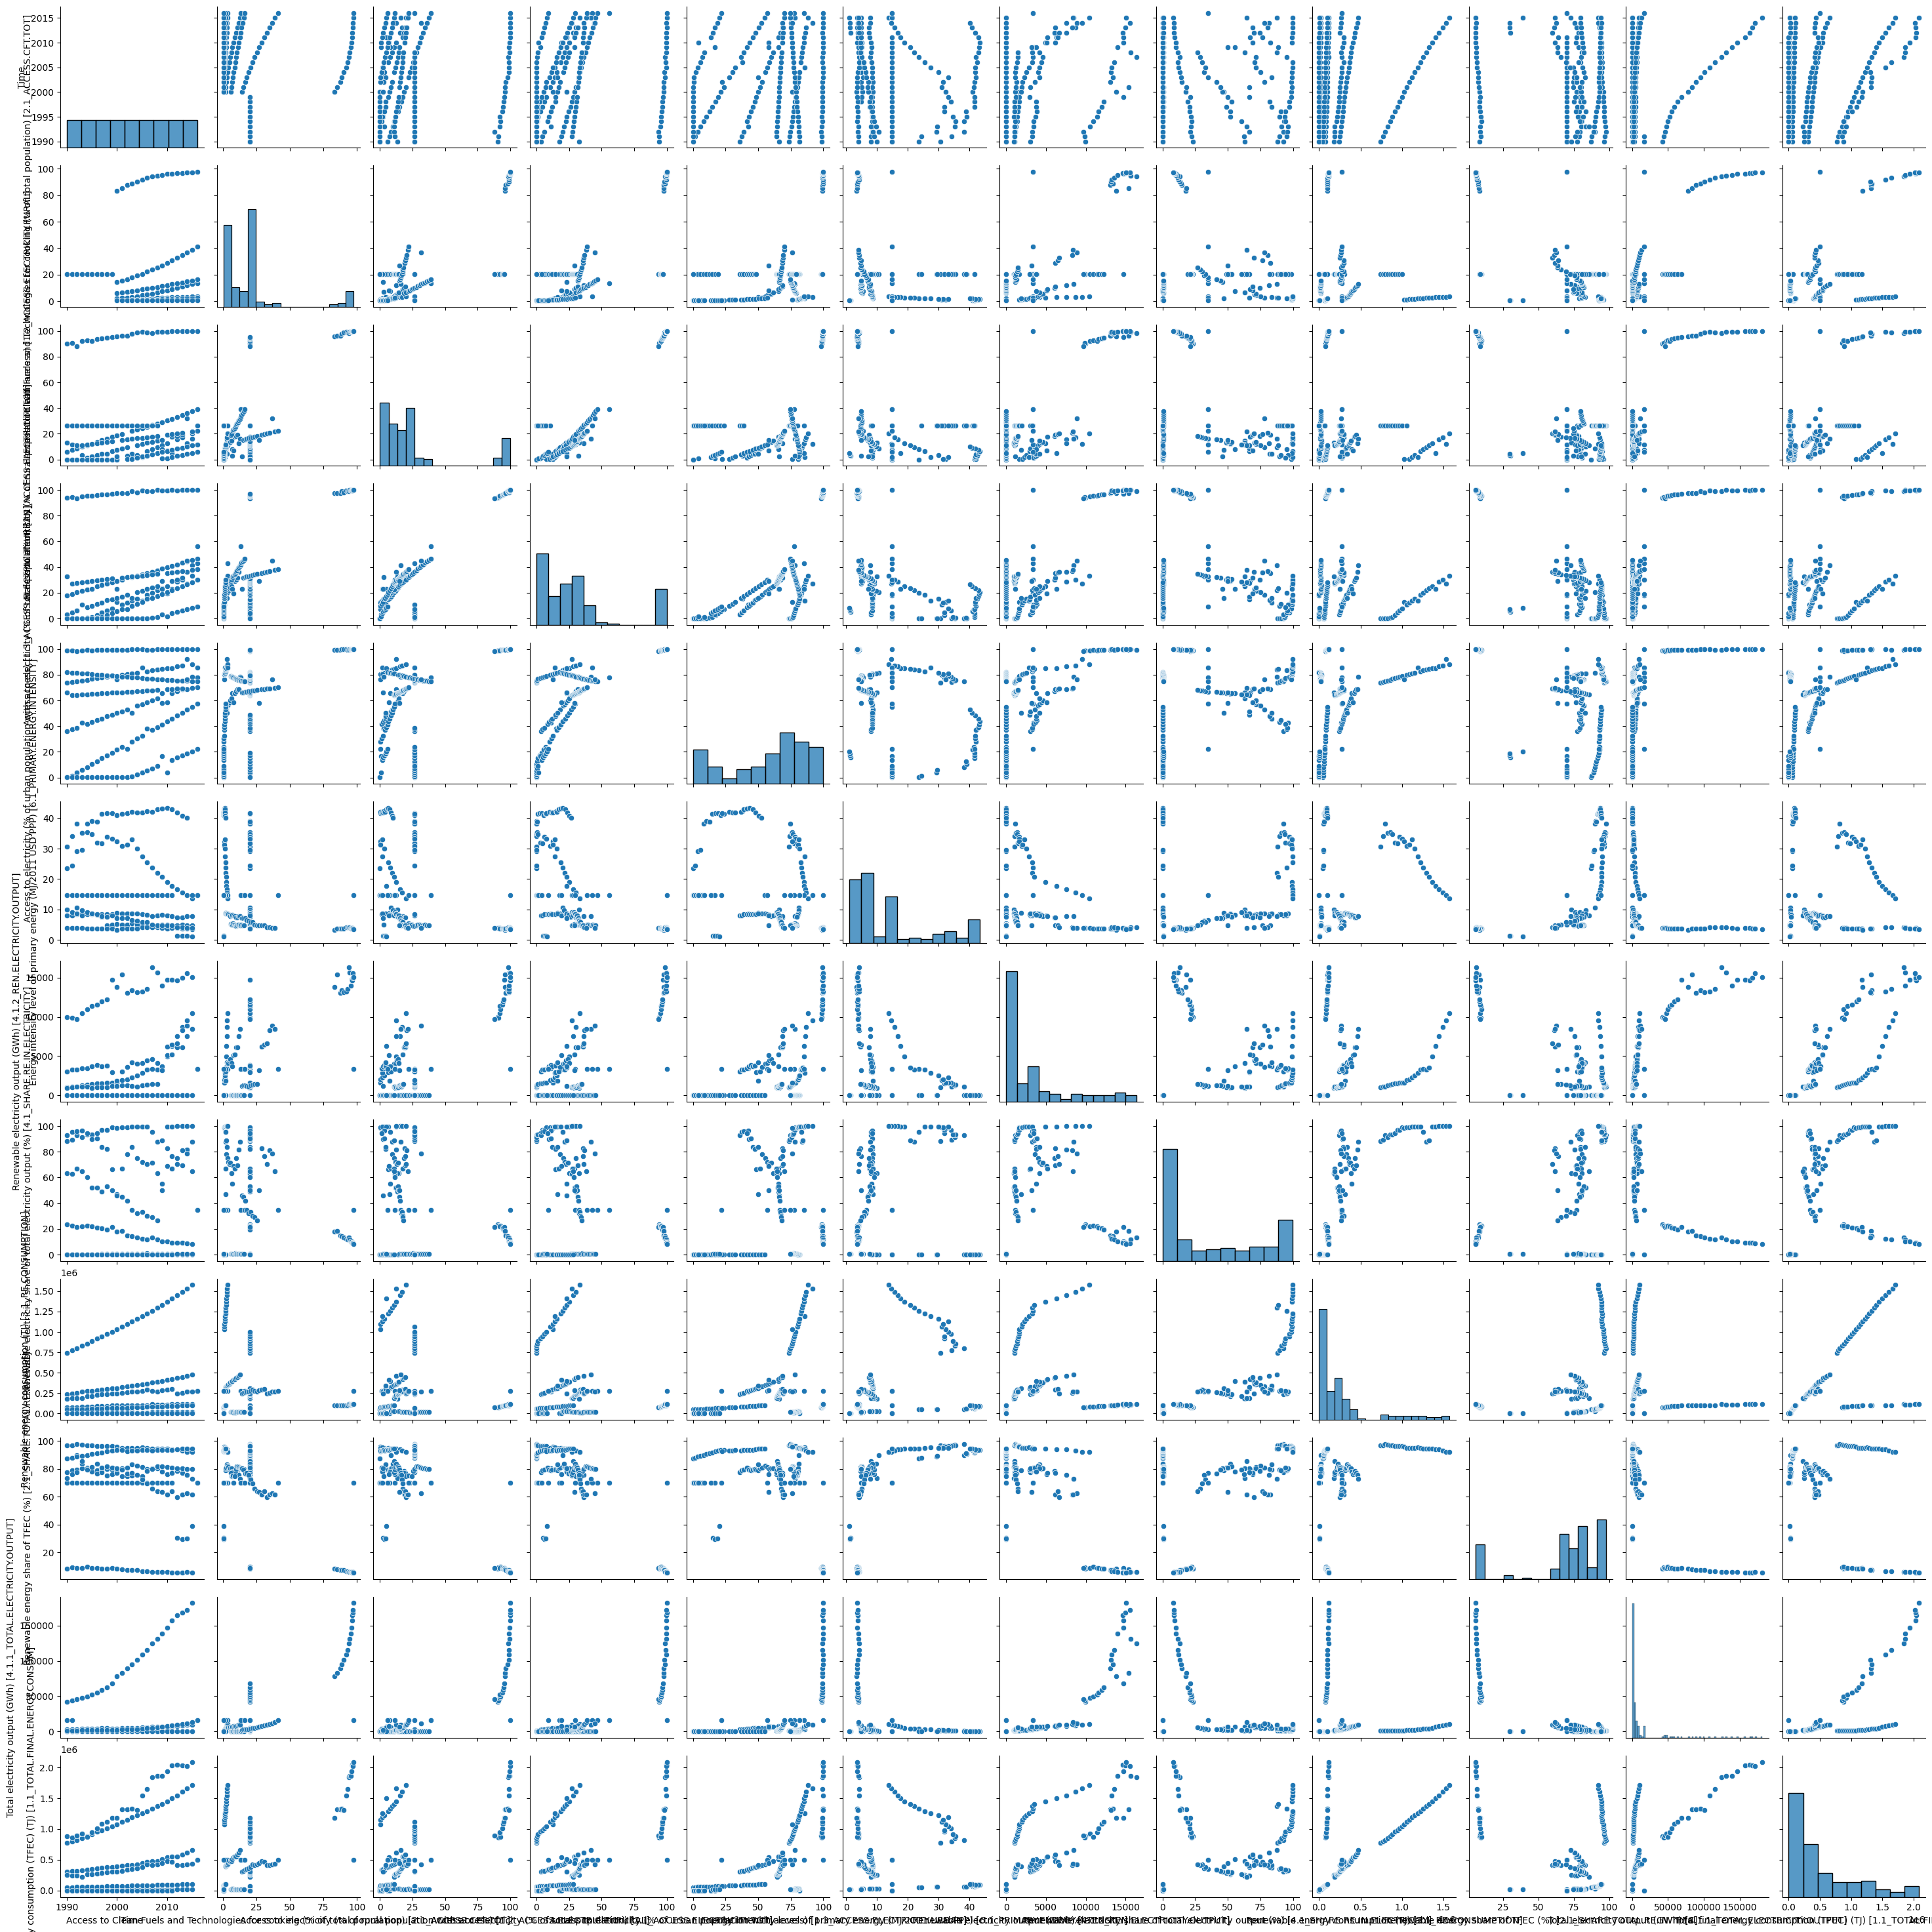

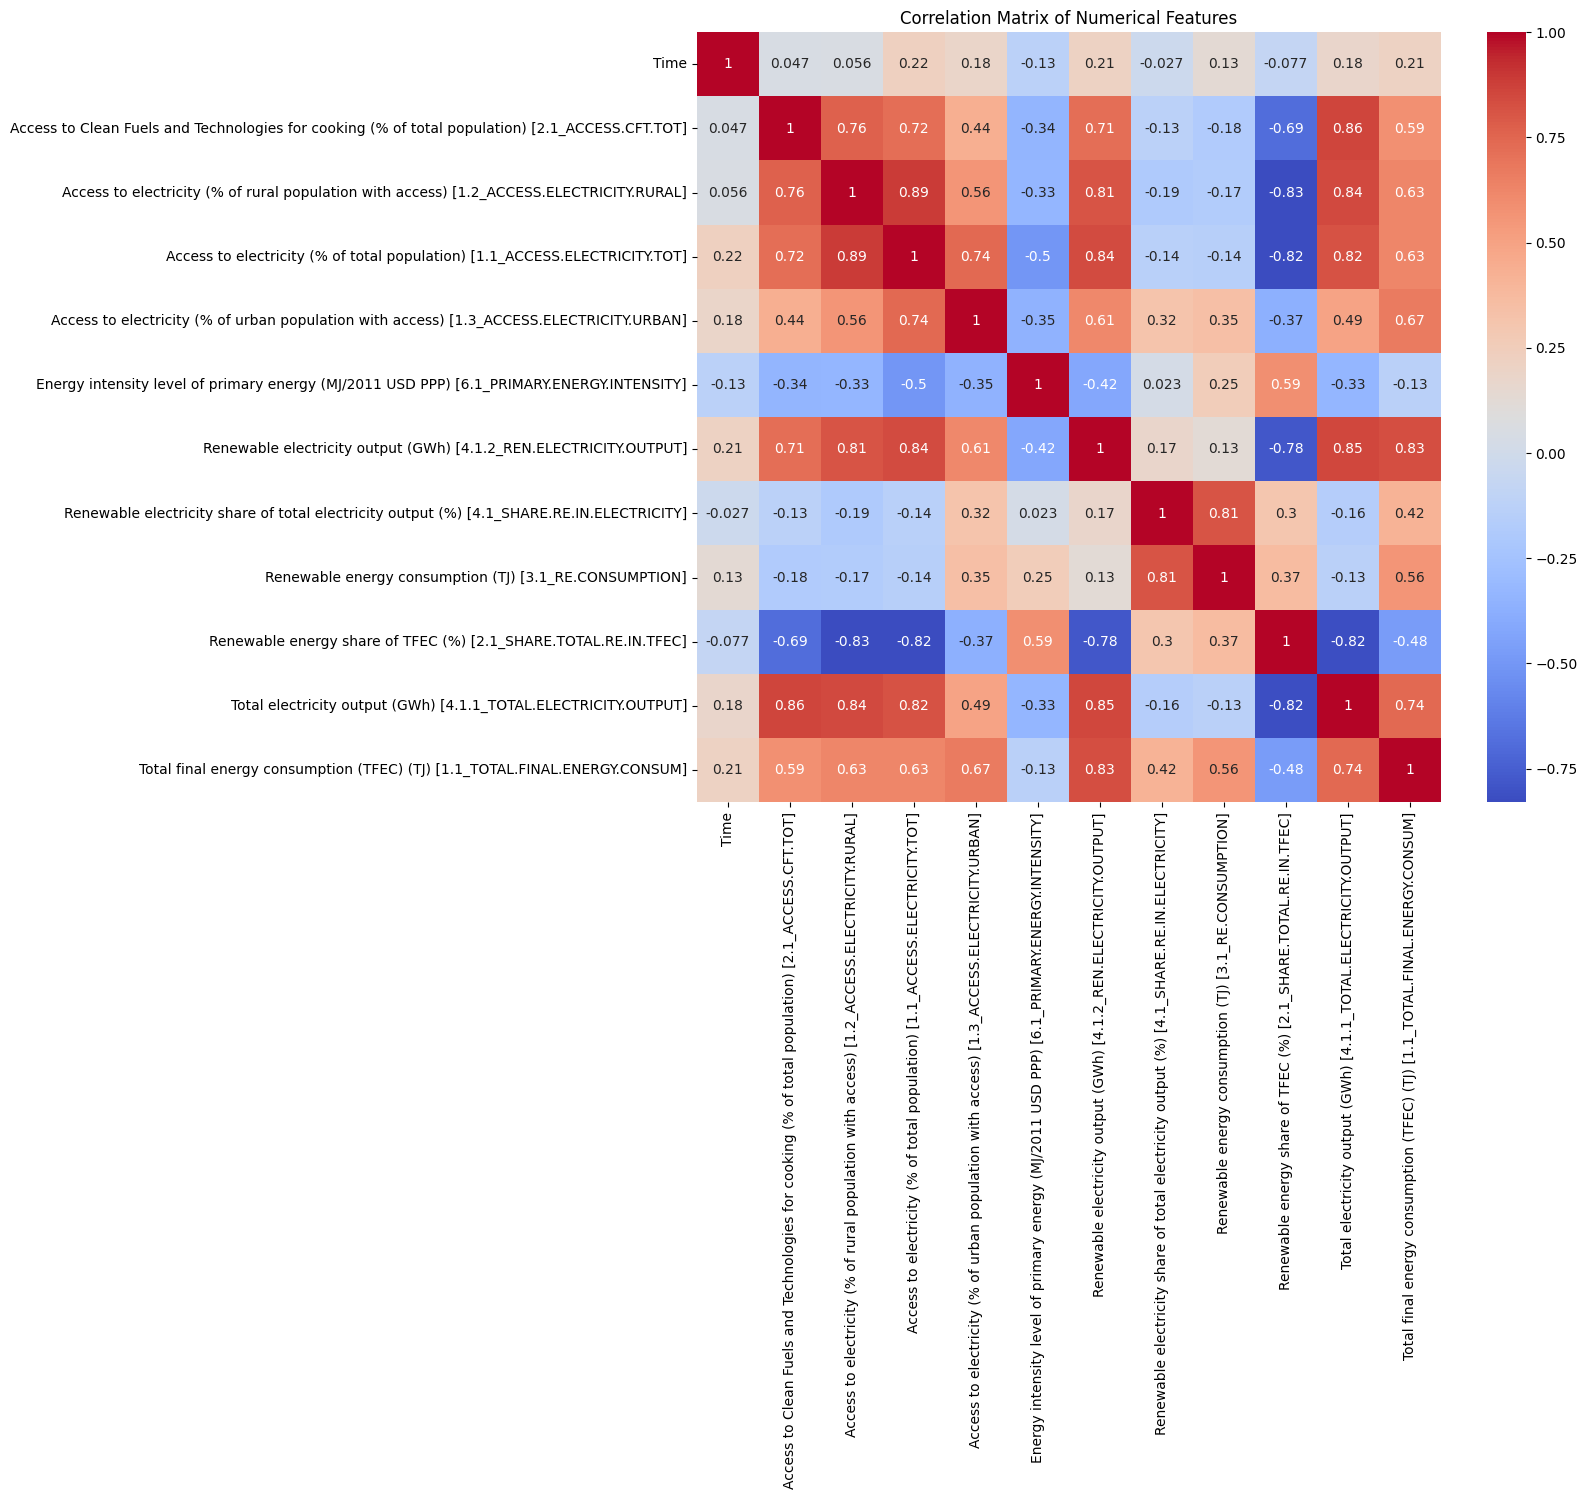

In [4]:
#Exploratory Data Analysis (EDA):
#Using dataframe df: Exploratory Data Analysis (EDA): Conduct in-depth EDA to uncover patterns, trends,
# and correlations.

# Import necessary libraries

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic dataframe information
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Visualize distributions of numerical features
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Analyze relationships between numerical features
sns.pairplot(df[numerical_cols])
plt.show()

# Calculate and visualize correlation matrix
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Explore categorical features
categorical_cols = df.select_dtypes(include=['category']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Frequency Distribution of {col}')
    plt.show()

# Analyze relationships between categorical and numerical features
for cat_col in categorical_cols:
    for num_col in numerical_cols:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=cat_col, y=num_col, data=df)
        plt.title(f'Relationship between {cat_col} and {num_col}')
        plt.show()


# Comparative Data Analysis:

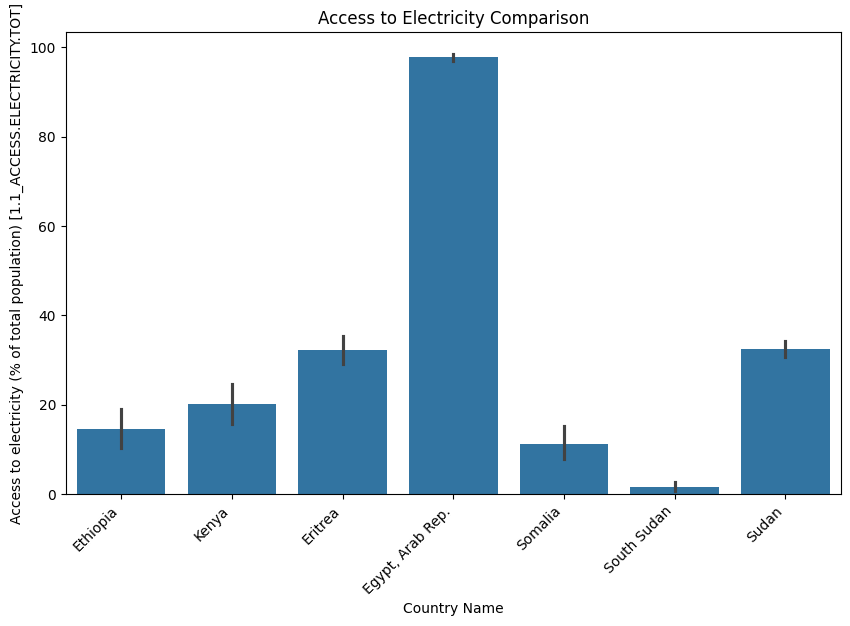

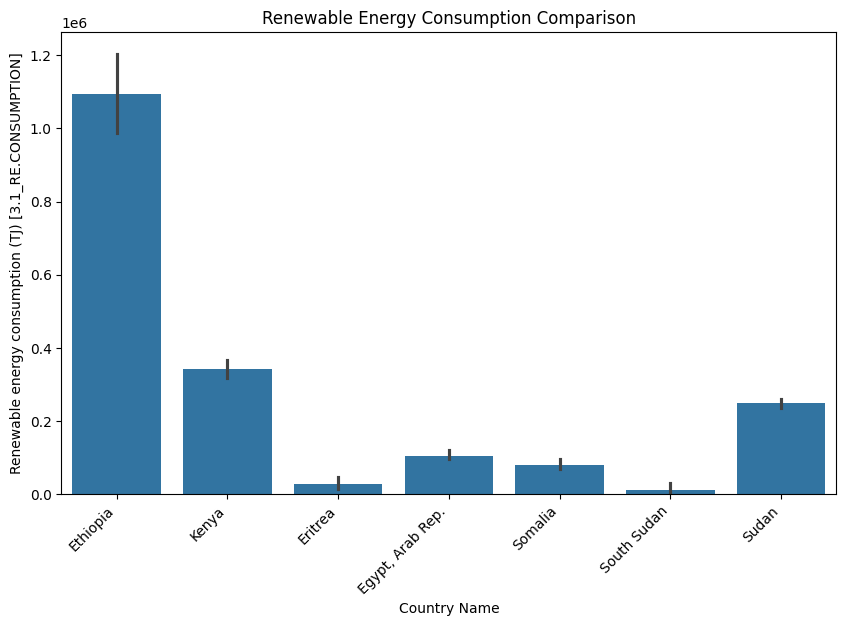

                  Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT]  \
Country Name                                                                                   
Egypt, Arab Rep.                                          97.734573                            
Eritrea                                                   32.276920                            
Ethiopia                                                  14.664601                            
Kenya                                                     20.140985                            
Somalia                                                   11.294079                            
South Sudan                                                1.663621                            
Sudan                                                     32.513583                            

                  Renewable energy consumption (TJ) [3.1_RE.CONSUMPTION]  
Country Name                                                

In [5]:
# demographic, geographic, and/or historical and political of
# comparative analysis between Ethiopia and Ethiopia's neighboring countries which are Eritrea, Djibouti, Somalia, Kenya, South Sudan, and Sudan


import pandas as pd
import matplotlib.pyplot as plt
# Select specific countries for comparison
countries_to_compare = ['Kenya', 'Eritrea', 'Egypt, Arab Rep.', 'Somalia', 'South Sudan', 'Sudan']
ethiopia_data = df[df['Country Name'] == 'Ethiopia']
comparison_data = df[df['Country Name'].isin(countries_to_compare)]

# Concatenate Ethiopia's data with the comparison countries' data
combined_df = pd.concat([ethiopia_data, comparison_data], ignore_index=True)

# Now you can perform comparative analysis
# Example: Comparing access to electricity
plt.figure(figsize=(10, 6))
sns.barplot(x='Country Name', y='Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT]', data=combined_df)
plt.title('Access to Electricity Comparison')
plt.xticks(rotation=45, ha='right')
plt.show()

# You can perform similar comparisons for other relevant features
# Example: Comparing renewable energy consumption
plt.figure(figsize=(10,6))
sns.barplot(x='Country Name', y='Renewable energy consumption (TJ) [3.1_RE.CONSUMPTION]', data = combined_df)
plt.title('Renewable Energy Consumption Comparison')
plt.xticks(rotation=45, ha='right')
plt.show()


#Further analysis (example using groupby)
grouped_data = combined_df.groupby('Country Name')[['Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT]', 'Renewable energy consumption (TJ) [3.1_RE.CONSUMPTION]']].mean()
print(grouped_data)

# Perform more sophisticated statistical tests or use clustering algorithms for deeper analysis
# For example, calculate the Euclidean distance or cosine similarity between Ethiopia and other countries based on multiple features.
from scipy.spatial.distance import euclidean, cosine
# Example of Euclidean distance
ethiopia_features = ethiopia_data[['Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT]', 'Renewable energy consumption (TJ) [3.1_RE.CONSUMPTION]']].values[0]
for country in countries_to_compare:
  country_data = df[df['Country Name'] == country]
  country_features = country_data[['Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT]', 'Renewable energy consumption (TJ) [3.1_RE.CONSUMPTION]']].values[0]
  distance = euclidean(ethiopia_features, country_features)
  print(f'Euclidean Distance between Ethiopia and {country}: {distance}')


# Predictive Modeling:

In [6]:
# Predictive Modeling:
# make informed decisions "the title of the project is "Overcoming Critical Challenges in Sustainable Energy Access and Utilization in Ethiopia: A Data-Driven Approach Using World Bank Indicators"

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler


# Define features (X) and target variable (y)
features = ['Access to electricity (% of rural population with access) [1.2_ACCESS.ELECTRICITY.RURAL]',
            'Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT]',
            'Access to electricity (% of urban population with access) [1.3_ACCESS.ELECTRICITY.URBAN]',
            'Energy intensity level of primary energy (MJ/2011 USD PPP) [6.1_PRIMARY.ENERGY.INTENSITY]',
            'Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT]',
            'Renewable energy consumption (TJ) [3.1_RE.CONSUMPTION]',
            'Total electricity output (GWh) [4.1.1_TOTAL.ELECTRICITY.OUTPUT]',
            'Total final energy consumption (TFEC) (TJ) [1.1_TOTAL.FINAL.ENERGY.CONSUM]']

target = 'Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY]'

X = df[features]
y = df[target]

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 1. Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
print("Linear Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, lr_predictions))
print("R-squared:", r2_score(y_test, lr_predictions))

# 2. Decision Tree Regression
dt_model = DecisionTreeRegressor(random_state=42)  # You can tune hyperparameters
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
print("\nDecision Tree Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, dt_predictions))
print("R-squared:", r2_score(y_test, dt_predictions))

# 3. Random Forest Regression
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)  # Tune hyperparameters
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print("\nRandom Forest Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, rf_predictions))
print("R-squared:", r2_score(y_test, rf_predictions))


Linear Regression:
Mean Squared Error: 341.09894371214364
R-squared: 0.7968206754685205

Decision Tree Regression:
Mean Squared Error: 34.03800070926565
R-squared: 0.9797248917946022

Random Forest Regression:
Mean Squared Error: 19.43947469638415
R-squared: 0.9884206638253582


# Required libraries for building Dashboard Development:

In [ ]:
# # Install the required libraries for building interactive web applications and visualizations:
# 1. dash: A Python framework for creating interactive, web-based dashboards.
# 2. dash-bootstrap-components: Provides Bootstrap components to style Dash apps easily.
# 3. plotly: A graphing library to create interactive, high-quality visualizations.
!pip install dash
!pip install dash-bootstrap-components
!pip install plotly


# Dashboard Development:

In [16]:
# Import necessary libraries and modules:
# 1. dash: The core Dash library for creating web-based applications.
# 2. dcc, html, Input, Output: Components and tools from Dash to define app elements, handle user input, and manage app interactions.
# 3. dash_bootstrap_components as dbc: Provides pre-styled Bootstrap components to enhance the appearance and layout of Dash applications.
# 4. plotly.express as px: A simplified interface for creating common types of interactive plots with the Plotly library.
# 5. pandas as pd: A powerful data manipulation and analysis library for handling and processing tabular data.
import dash
from dash import dcc, html, Input, Output
import dash_bootstrap_components as dbc
import plotly.express as px
import pandas as pd

import dash
from dash import dcc, html, Input, Output
import dash_bootstrap_components as dbc
import plotly.express as px
import pandas as pd

# Load the cleaned data
url = "https://drive.google.com/uc?id=1tESjmqrRV38BBIDyKCM5eMxemPWSM9F2&export=download"
df = pd.read_csv(url)

# Clean column names
df.columns = df.columns.str.strip()

# Define column options with user-friendly labels
column_labels = {
    'Country Name': 'Country',
    'Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY]': 'Renewable Electricity Share (%)',
    'GDP': 'Gross Domestic Product (GDP)',
    'Population': 'Total Population',
}

dropdown_options = [{'label': column_labels.get(col, col), 'value': col} for col in df.columns]

# Initialize the Dash app with a Bootstrap theme
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Define the app layout
app.layout = dbc.Container([
    html.H1("Interactive Energy Dashboard", className='text-center mb-4', style={'fontFamily': 'Arial, sans-serif'}),

    dbc.Card([
        dbc.CardBody([
            html.H4("Select Features and Plot Type", className='card-title'),

            dbc.Row([
                dbc.Col([
                    html.Label("X-axis Feature", className='font-weight-bold'),
                    dcc.Dropdown(
                        id='x-axis-dropdown',
                        options=dropdown_options,
                        value='Country Name',
                        className='mb-3'
                    )
                ], width=4),

                dbc.Col([
                    html.Label("Y-axis Feature", className='font-weight-bold'),
                    dcc.Dropdown(
                        id='y-axis-dropdown',
                        options=dropdown_options,
                        value='Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY]',
                        className='mb-3'
                    )
                ], width=4),

                dbc.Col([
                    html.Label("Plot Type", className='font-weight-bold'),
                    dcc.Dropdown(
                        id='plot-type-dropdown',
                        options=[
                            {'label': 'Scatter Plot', 'value': 'scatter'},
                            {'label': 'Line Plot', 'value': 'line'},
                            {'label': 'Bar Plot', 'value': 'bar'},
                            {'label': 'Box Plot', 'value': 'box'},
                        ],
                        value='scatter',
                        className='mb-3'
                    )
                ], width=4),
            ]),

            html.Label("Year Range", className='font-weight-bold'),
            dcc.RangeSlider(
                id='year-slider',
                min=df['Year'].min() if 'Year' in df.columns else 2000,
                max=df['Year'].max() if 'Year' in df.columns else 2023,
                step=1,
                value=[2000, 2023],
                marks={year: str(year) for year in range(2000, 2024, 2)},
                className='mb-4'
            ),
        ])
    ], className='mb-4 shadow-lg'),

    dbc.Row([
        dbc.Col(dcc.Graph(id='dynamic-plot'), width=12)
    ], className='mb-4'),

    html.Hr(),

    html.H3("Static Plots", className='text-center mt-4 mb-3'),

    dbc.Row([
        dbc.Col(dcc.Graph(id='static-histogram'), width=6),
        dbc.Col(dcc.Graph(id='static-box-plot'), width=6),
    ]),

    html.Div(id='plot-description', className='text-center mt-4', style={'fontFamily': 'Arial, sans-serif'}),
], fluid=True)

# Define the callback to update the dynamic plot and static plots
@app.callback(
    [Output('dynamic-plot', 'figure'),
     Output('static-histogram', 'figure'),
     Output('static-box-plot', 'figure'),
     Output('plot-description', 'children')],
    [Input('x-axis-dropdown', 'value'),
     Input('y-axis-dropdown', 'value'),
     Input('plot-type-dropdown', 'value'),
     Input('year-slider', 'value')]
)
def update_graph(selected_x, selected_y, plot_type, selected_years):
    # Filter data based on the selected year range
    if 'Year' in df.columns:
        filtered_df = df[(df['Year'] >= selected_years[0]) & (df['Year'] <= selected_years[1])]
    else:
        filtered_df = df

    # Create the dynamic plot based on the selected plot type
    if plot_type == 'scatter':
        dynamic_fig = px.scatter(filtered_df, x=selected_x, y=selected_y, color='Country Name', title="Scatter Plot")
    elif plot_type == 'line':
        dynamic_fig = px.line(filtered_df, x=selected_x, y=selected_y, color='Country Name', title="Line Plot")
    elif plot_type == 'bar':
        dynamic_fig = px.bar(filtered_df, x=selected_x, y=selected_y, color='Country Name', title="Bar Plot")
    elif plot_type == 'box':
        dynamic_fig = px.box(filtered_df, x=selected_x, y=selected_y, color='Country Name', title="Box Plot")

    # Update layout for the dynamic plot
    dynamic_fig.update_layout(
        xaxis_title=column_labels.get(selected_x, selected_x),
        yaxis_title=column_labels.get(selected_y, selected_y),
        height=500,
        margin=dict(l=40, r=40, t=50, b=40),
        template='plotly_white'
    )

    # Static plots
    histogram_fig = px.histogram(filtered_df, x=selected_y, nbins=20, title=f"Distribution of {column_labels.get(selected_y, selected_y)}")
    histogram_fig.update_layout(template='plotly_white')

    box_plot_fig = px.box(filtered_df, x=selected_x, y=selected_y, color='Country Name', title=f"Box Plot of {column_labels.get(selected_y, selected_y)} by {column_labels.get(selected_x, selected_x)}")
    box_plot_fig.update_layout(template='plotly_white')

    # Generate plot description
    plot_description = f"The plot shows how {column_labels.get(selected_y, selected_y)} varies with {column_labels.get(selected_x, selected_x)} between {selected_years[0]} and {selected_years[1]}. Hover over the points for detailed information."

    return dynamic_fig, histogram_fig, box_plot_fig, plot_description

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port=8050)


<IPython.core.display.Javascript object>